In [1]:
# activate project environment
# include these lines of code in any future scripts/notebooks
#---
import Pkg
if !haskey(Pkg.installed(), "AA228FinalProject")
    jenv = joinpath(dirname(@__FILE__()), ".") # this assumes the notebook is in the same dir
    # as the Project.toml file, which should be in top level dir of the project. 
    # Change accordingly if this is not the case.
    Pkg.activate(jenv)
end
Pkg.instantiate()
Pkg.build("Cairo")
#---

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %>   ]  90.2 %  Updating registry at `~/.julia/registries/JuliaPOMDP`
  Updating git-repo `https://github.com/JuliaPOMDP/Registry`
  Building LibCURL ─→ `~/.julia/packages/LibCURL/OoXMv/deps/build.log`
  Building WinRPM ──→ `~/.julia/packages/WinRPM/Y9QdZ/deps/build.log`
  Building Homebrew → `~/.julia/packages/Homebrew/l8kUw/deps/build.log`
  Building Cairo ───→ `~/.julia/packages/Cairo/CXPG1/deps/build.log`


In [4]:
Pkg.add("JLD")
using JLD
using Gtk
using Random
using Printf
using Plots
using Statistics

 Resolving package versions...
  Updating `Project.toml`
 [no changes]
  Updating `Manifest.toml`
 [no changes]


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186
┌ Warning: Module Compat with build ID 50331722029654 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941
┌ Warning: Module Compat with build ID 50331722029654 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941
┌ Info: Precompiling Showoff [992d4aef-0814-514b-bc4d-f2e9a6c4116f]
└ @ Base loading.jl:1186
┌ Warning: Module Compat with build ID 50331722029654 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:941


In [44]:
@load "naive_total_rewards.jld"
@load "qmdp_total_rewards.jld"
@load "fib_total_rewards.jld"
@load "pomcp_total_rewards.jld"
@load "pomcp_heuristic_total_rewards.jld"

bar_plot = bar(title="Reward from Varying Algorithm", ylabel="Reward", xlabel="Algorithm", legend = :bottomright)    
bar!(bar_plot, ["Naive"], [mean(naive_total_rewards[1:20])], yerr = std(naive_total_rewards[1:20])/sqrt(20), label="Naive")
bar!(bar_plot, ["QMDP"], [mean(qmdp_total_rewards[1:20])], yerr = std(qmdp_total_rewards[1:20])/sqrt(20), label="QMDP")
bar!(bar_plot, ["FIB"], [mean(fib_total_rewards[1:20])], yerr = std(fib_total_rewards[1:20])/sqrt(20), label="FIB")
bar!(bar_plot, ["POMCP"], [mean(pomcp_total_rewards[1:20])], yerr = std(pomcp_total_rewards[1:20])/sqrt(20), label="POMCP")
bar!(bar_plot, ["POMCP with heuristic"], [mean(pomcp_heuristic_total_rewards[1:20])], yerr = std(pomcp_heuristic_total_rewards)/sqrt(20), label="POMCP with heuristic")

savefig("Reward-results")

In [45]:
@load "pomcp_c_total_rewards_0.jld"
@load "pomcp_c_total_rewards_1.jld"
@load "pomcp_c_total_rewards_5.jld"
@load "pomcp_c_total_rewards_10.jld"

bar_plot = bar(title="Reward from Varying POMCP Exploration Constant", ylabel="Reward", xlabel="UCB Exploration Constant", legend = :bottomright)    
bar!(bar_plot, ["0.5"], [mean(pomcp_c_total_rewards_0[1:20])], yerr = std(pomcp_c_total_rewards_0)/sqrt(20), label="0.5")
bar!(bar_plot, ["1.0"], [mean(pomcp_c_total_rewards_1[1:20])], yerr = std(pomcp_c_total_rewards_1)/sqrt(20), label="1.0")
bar!(bar_plot, ["5.0"], [mean(pomcp_c_total_rewards_5[1:20])], yerr = std(pomcp_c_total_rewards_5[1:20])/sqrt(20), label="5.0")
bar!(bar_plot, ["10.0"], [mean(pomcp_c_total_rewards_10[1:20])], yerr = std(pomcp_c_total_rewards_10)/sqrt(20), label="10.0")

savefig("exploration-results")

In [47]:
@load "pomcp_depth_total_rewards_10.jld"
@load "pomcp_depth_total_rewards_20.jld"
@load "pomcp_depth_total_rewards_50.jld"
@load "pomcp_depth_total_rewards_100.jld"

bar_plot = bar(title="Reward from Varying POMCP Max Depth", ylabel="Reward", xlabel="Max Rollout Depth", legend = :bottomright)    
bar!(bar_plot, ["10"], [mean(pomcp_depth_total_rewards_10[1:20])], yerr = std(pomcp_depth_total_rewards_10)/sqrt(20), label="10")
bar!(bar_plot, ["20"], [mean(pomcp_depth_total_rewards_20[1:20])], yerr = std(pomcp_depth_total_rewards_20)/sqrt(20), label="20")
bar!(bar_plot, ["50"], [mean(pomcp_depth_total_rewards_50[1:20])], yerr = std(pomcp_depth_total_rewards_50[1:20])/sqrt(20), label="50")
bar!(bar_plot, ["100"], [mean(pomcp_depth_total_rewards_100[1:20])], yerr = std(pomcp_depth_total_rewards_100)/sqrt(20), label="100")

savefig("depth-results")

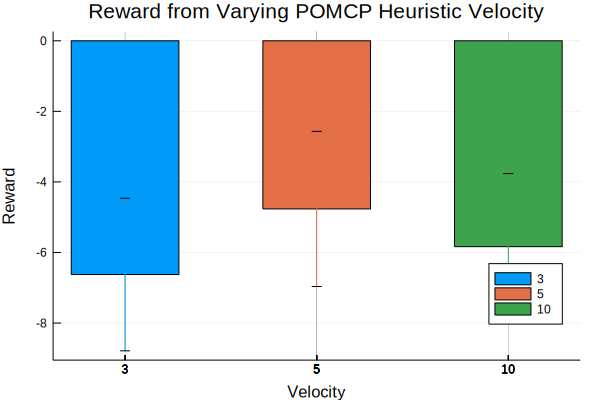

In [51]:
@load "pomcp_heuristic_3_total_rewards.jld"
@load "pomcp_heuristic_total_rewards.jld"
@load "pomcp_heuristic_10_total_rewards.jld"

bar_plot = bar(title="Reward from Varying POMCP Heuristic Velocity", ylabel="Reward", xlabel="Velocity", legend = :bottomright)    
bar!(bar_plot, ["3"], [mean(pomcp_heuristic_3_total_rewards[1:20])], yerr = std(pomcp_heuristic_3_total_rewards)/sqrt(20), label="3")
bar!(bar_plot, ["5"], [mean(pomcp_heuristic_total_rewards[1:20])], yerr = std(pomcp_heuristic_total_rewards)/sqrt(20), label="5")
bar!(bar_plot, ["10"], [mean(pomcp_heuristic_10_total_rewards[1:20])], yerr = std(pomcp_heuristic_10_total_rewards[1:20])/sqrt(20), label="10")

# savefig("heuristic-results")

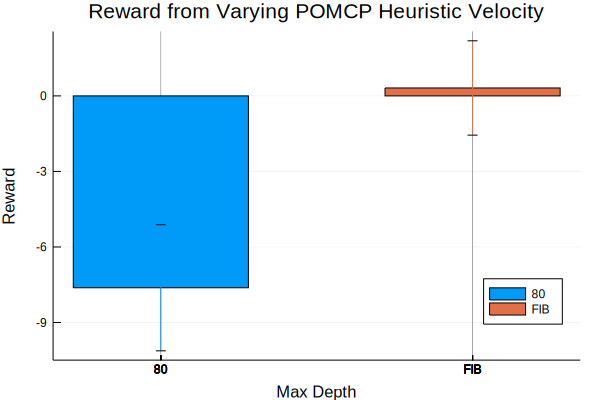

In [56]:
@load "pomcp_depth_total_rewards_80.jld"
bar_plot = bar(title="Reward from Varying POMCP Heuristic Velocity", ylabel="Reward", xlabel="Max Depth", legend = :bottomright)    
bar!(bar_plot, ["80"], [mean(pomcp_depth_total_rewards_100[1:10])], yerr = std(pomcp_depth_total_rewards_80[1:10])/sqrt(10), label="80")
bar!(bar_plot, ["FIB"], [mean(fib_total_rewards[1:20])], yerr = std(fib_total_rewards[1:20])/sqrt(20), label="FIB")


